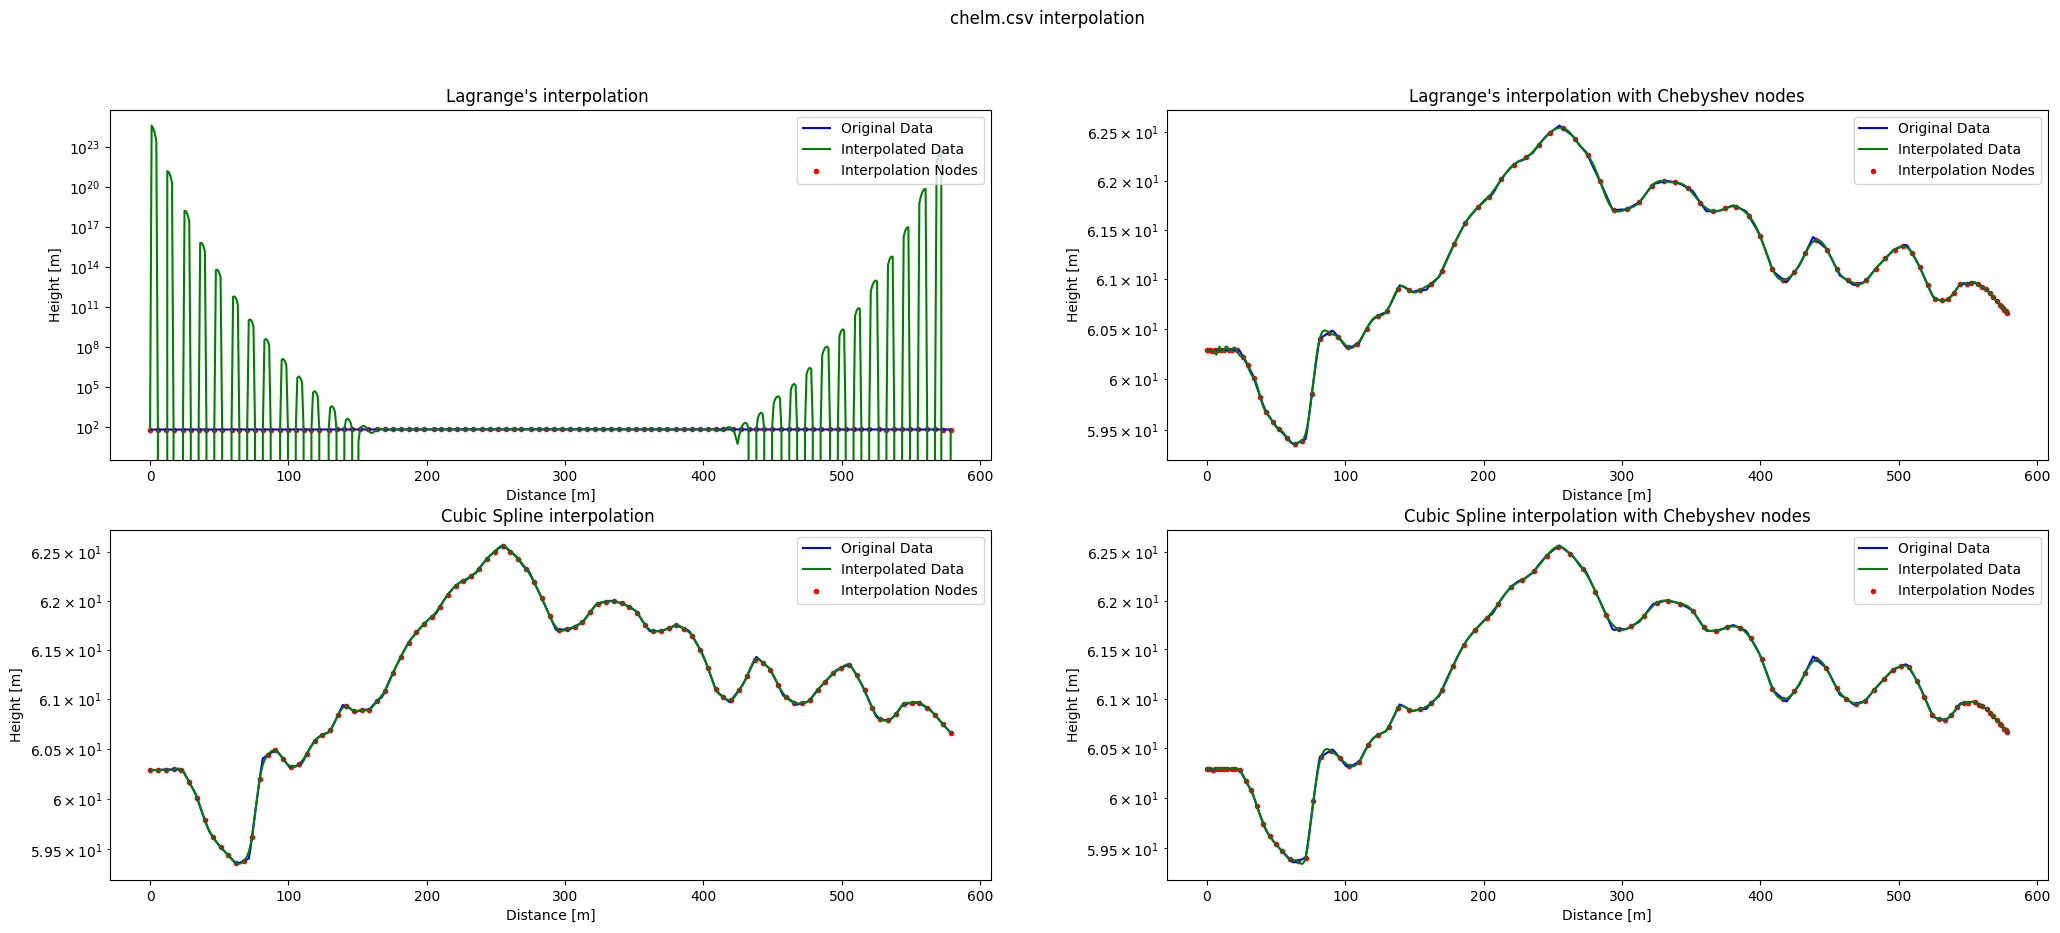

In [30]:
import matplotlib.pyplot as plt
from typing import Callable, List
from helper import *
import os

type PointsSelectionMethod = Tuple[Callable[[float, float, int], List[float]], str]
type InterpolationMethod = Tuple[Callable[[List[Tuple[float, float]], List[float]], List[float]], str]

def plot_interpolation(handler: any, data: List[Tuple[float, float]], title: str, selection_points_distribution_method: PointsSelectionMethod, number_of_selection_points: int, interpolation_method: InterpolationMethod, number_of_interpolation_points: int):
    selected_points = find_closest_nodes(data, selection_points_distribution_method[0](data[0][0], data[-1][0], number_of_selection_points))
    x_points = linspace(data[0][0], data[-1][0], number_of_interpolation_points)
    y_points = interpolation_method[0](selected_points, x_points)
    handler.plot(get_x_values(data), get_y_values(data), color='blue')
    handler.plot(x_points, y_points, color='green')
    handler.scatter(get_x_values(selected_points), get_y_values(selected_points), color='red', s=9)
    handler.title.set_text(f'{interpolation_method[1]} {selection_points_distribution_method[1]} ({number_of_selection_points} nodes)')
    handler.set_yscale('log')
    handler.legend(['Original Data', 'Interpolated Data', 'Interpolation Nodes'], loc='upper right')
    handler.set_xlabel('Distance [m]')
    handler.set_ylabel('Height [m]')

selection_points_distribution_methods = [[linspace, ""], [chebyshev_nodes, "with Chebyshev nodes"]]
interpolation_methods = [[lagrange_interpolation, "Lagrange's interpolation"], [cubic_interpolation, "Cubic Spline interpolation"]]

for file in os.listdir('../data'):
    nodes = read_nodes('../data/' + file)
    fig, axs = plt.subplots(2,2)
    fig.set_size_inches(25, 10)
    fig.suptitle(f'{file} interpolation')
    for i in range(2):
        plot_interpolation(axs[0][i], nodes, file, selection_points_distribution_methods[i], 100, interpolation_methods[0], 512)
        plot_interpolation(axs[1][i], nodes, file, selection_points_distribution_methods[i], 103, interpolation_methods[1], 512)
    plt.show()
    break

In [1]:
import matplotlib.pyplot as plt
from typing import Callable, List
from helper import *
import os
from pathlib import Path

def plot_interpolation(
        handler: any,
        data: List[Tuple[float, float]],
        selection_points_distribution_method: Callable[[float, float, int], List[float]],
        number_of_selection_points: int,
        interpolation_method: Callable[[List[Tuple[float, float]], List[float]], List[float]],
        number_of_interpolation_points: int
    ):
    selected_points = find_closest_nodes(data, selection_points_distribution_method[0](data[0][0], data[-1][0], number_of_selection_points))
    x_points = linspace(data[0][0], data[-1][0], number_of_interpolation_points)
    y_points = interpolation_method(selected_points, x_points)
    handler.plot(get_x_values(data), get_y_values(data), color='blue')
    handler.plot(x_points, y_points, color='green')
    handler.scatter(get_x_values(selected_points), get_y_values(selected_points), color='red', s=9)
    handler.title.set_text(f'{number_of_selection_points} nodes')
    handler.set_yscale('log')
    handler.legend(['Original Data', 'Interpolated Data', 'Interpolation Nodes'], loc='upper right')
    handler.set_xlabel('Distance [m]')
    handler.set_ylabel('Height [m]')

n = [100, 50, 25, 15, 10, 5][::-1]

selection_points_distribution_methods = [[linspace, "with linear nodes spread", "linspace"], [chebyshev_nodes, "with Chebyshev nodes", "chebyshev"]]

for file in os.listdir('../data'):
    nodes = read_nodes('../data/' + file)
    dataset_name = file.split('.csv')[0]
    Path(f'../plots/{dataset_name}').mkdir(parents=True, exist_ok=True)
    plt.figure(figsize=(10, 5))
    plt.plot(get_x_values(nodes), get_y_values(nodes), color='blue')
    plt.title(f'Original data | {file}')
    plt.xlabel('Distance [m]')
    plt.ylabel('Height [m]')
    plt.yscale('log')
    plt.savefig(f'../plots/{dataset_name}/1_original_data.png')
    plt.clf()
    for distribution_method in selection_points_distribution_methods:
        fig, axs = plt.subplots(3, 2)
        fig.set_size_inches(20, 15)
        fig.suptitle(f'Lagrange\'s interpolation {distribution_method[1]} vs number of interpolation nodes | {file}')
        for i in range(6):
            plot_interpolation(axs[i//2][i%2], nodes, distribution_method, n[i], lagrange_interpolation, 512)
        plt.savefig(f'../plots/{dataset_name}/2_1_lagrange_{distribution_method[2]}.png')
        plt.clf()

<Figure size 1000x500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

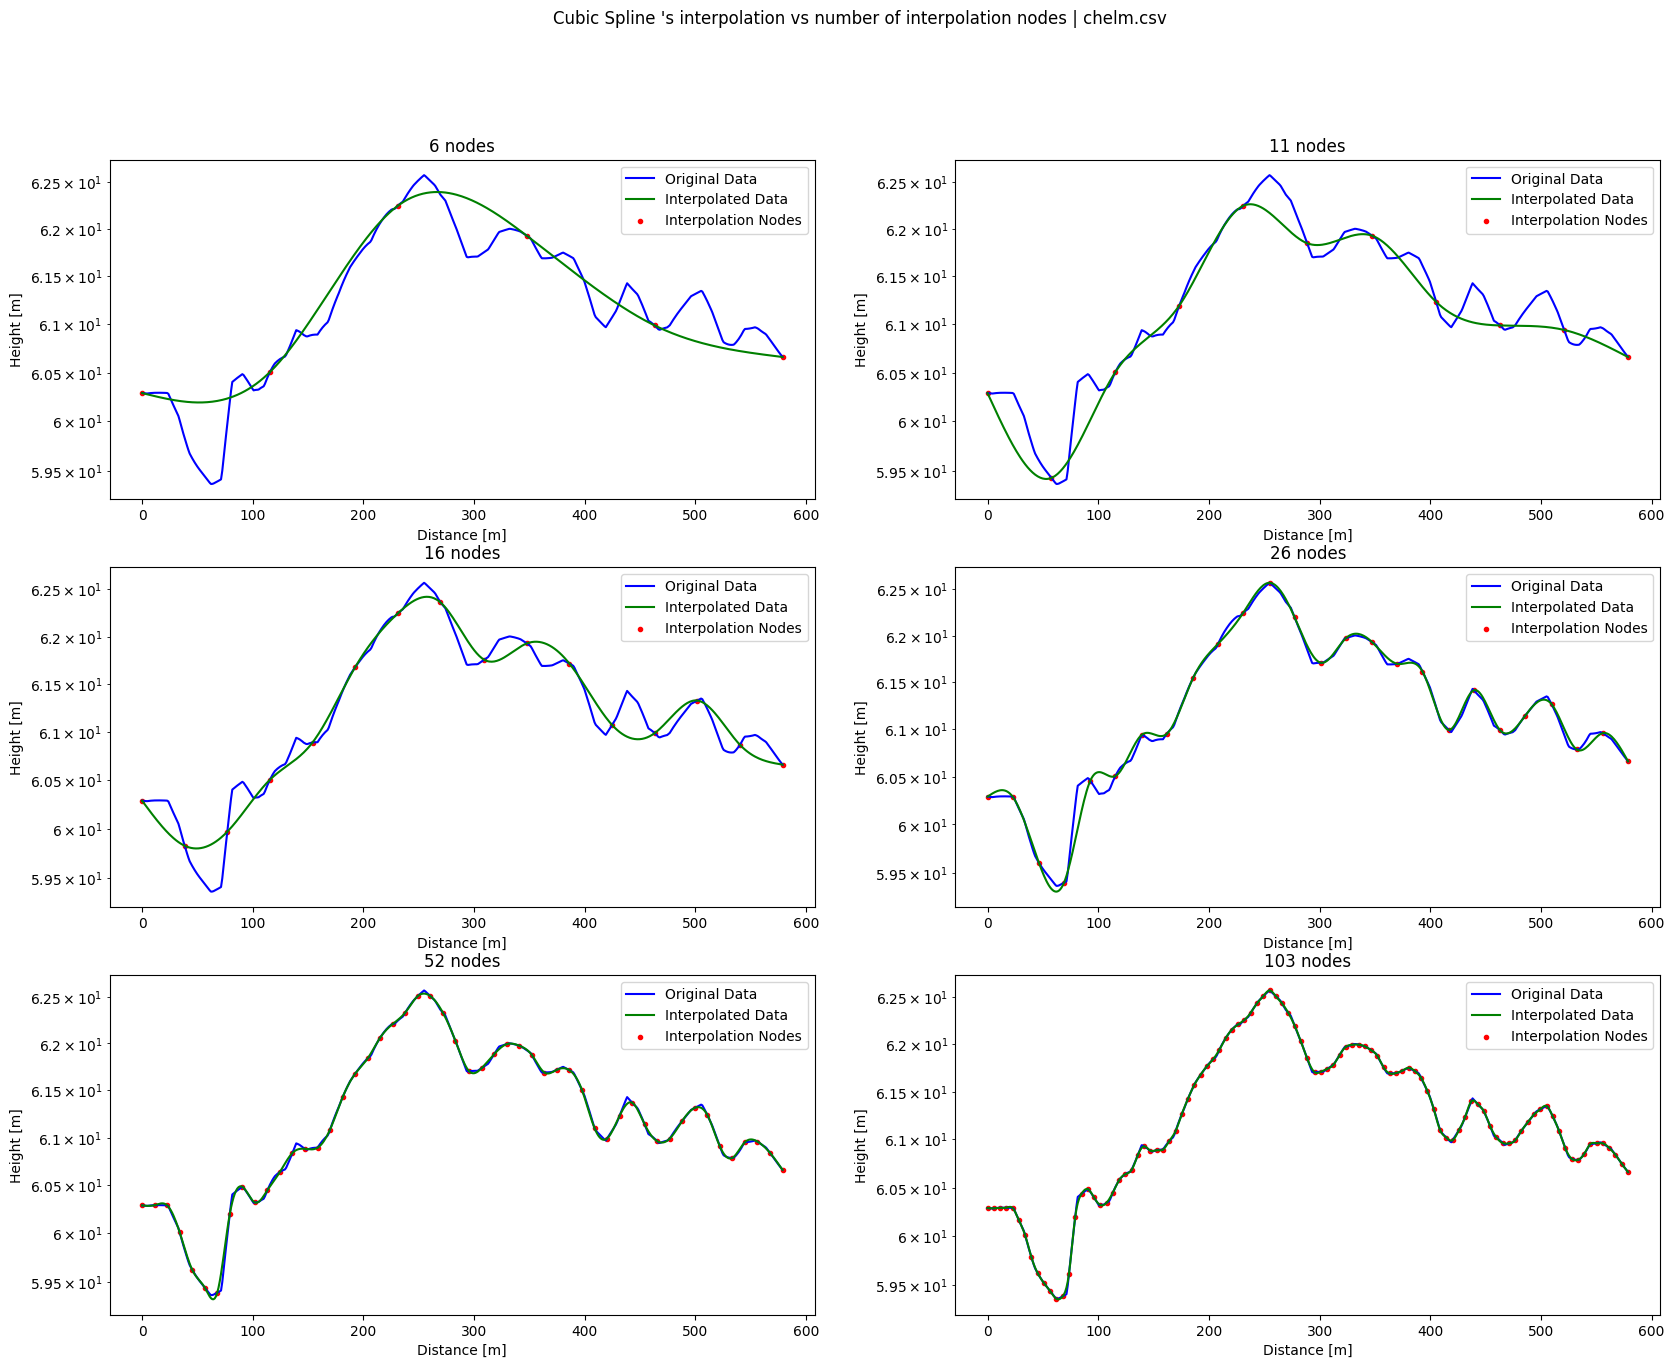

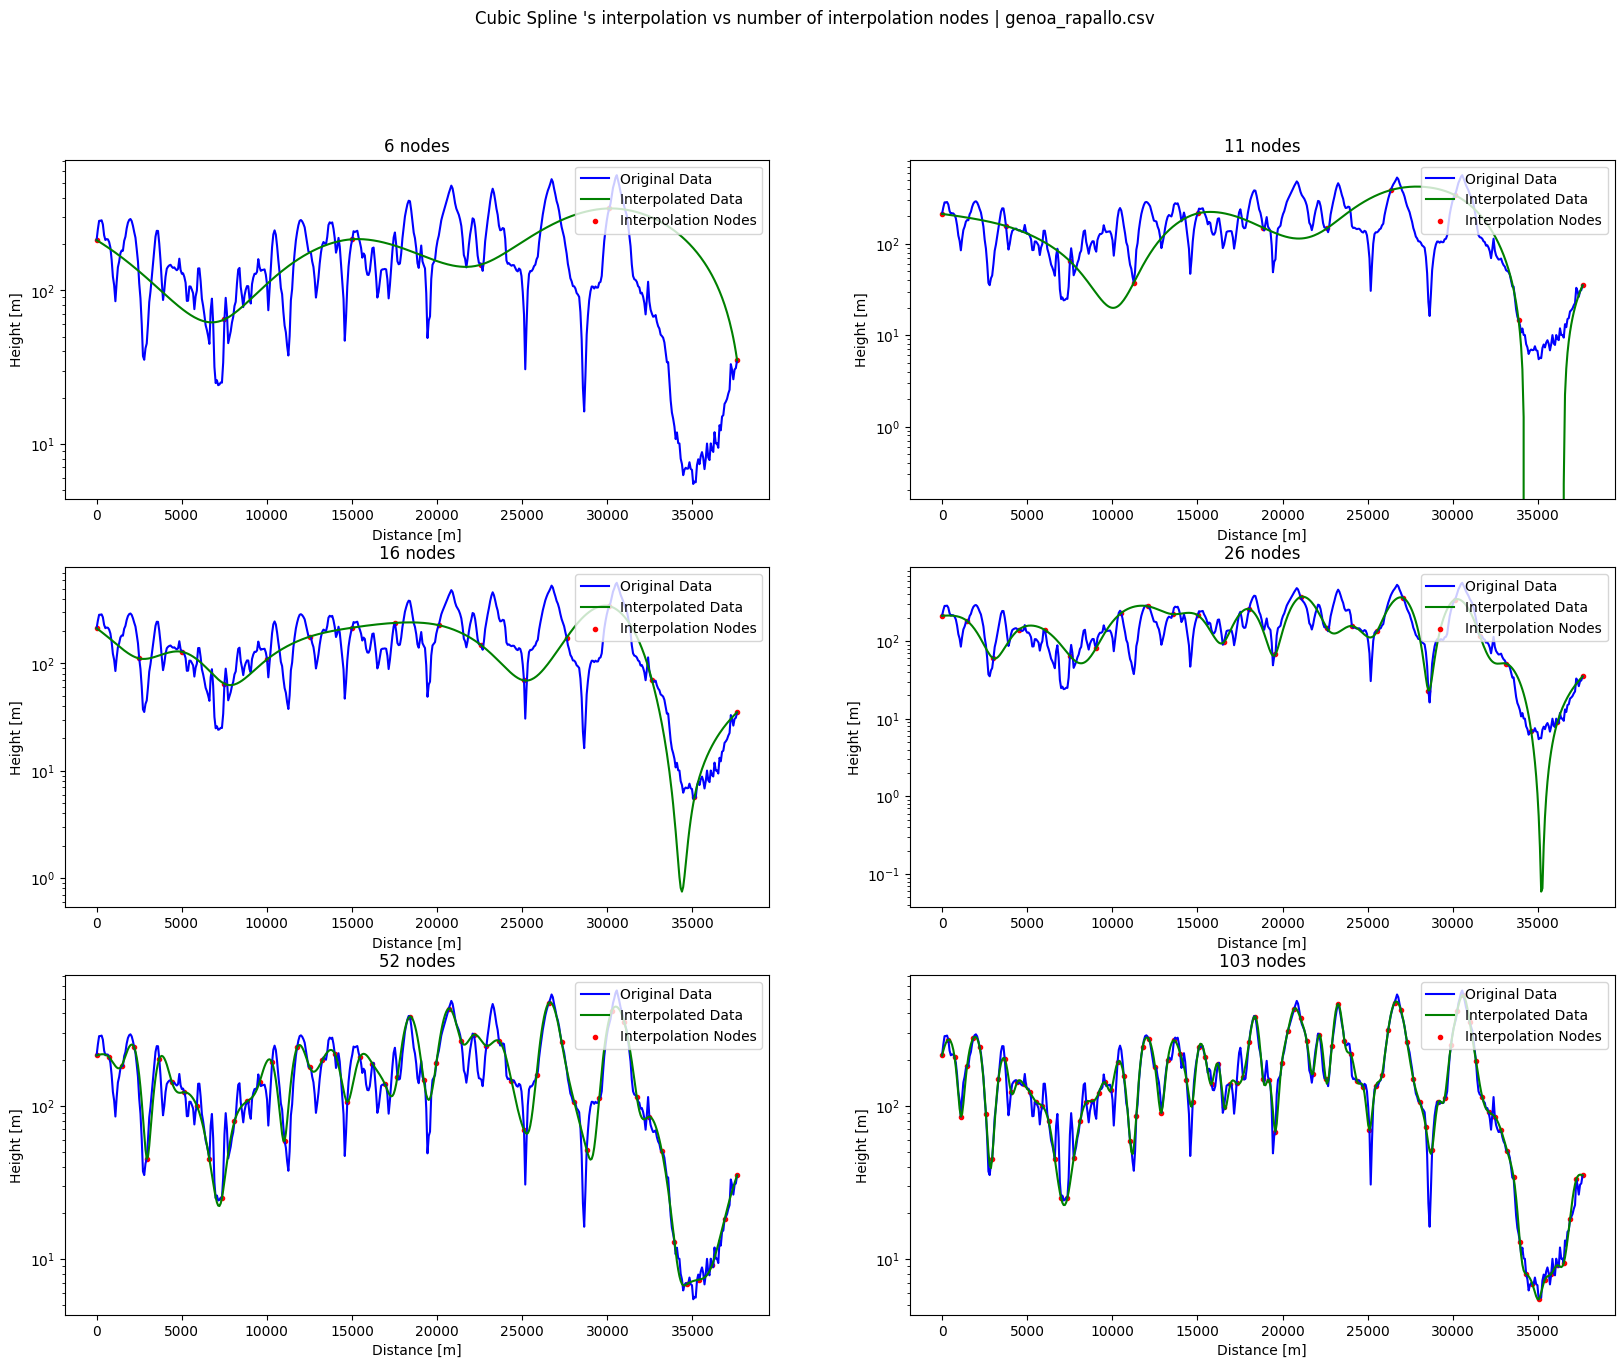

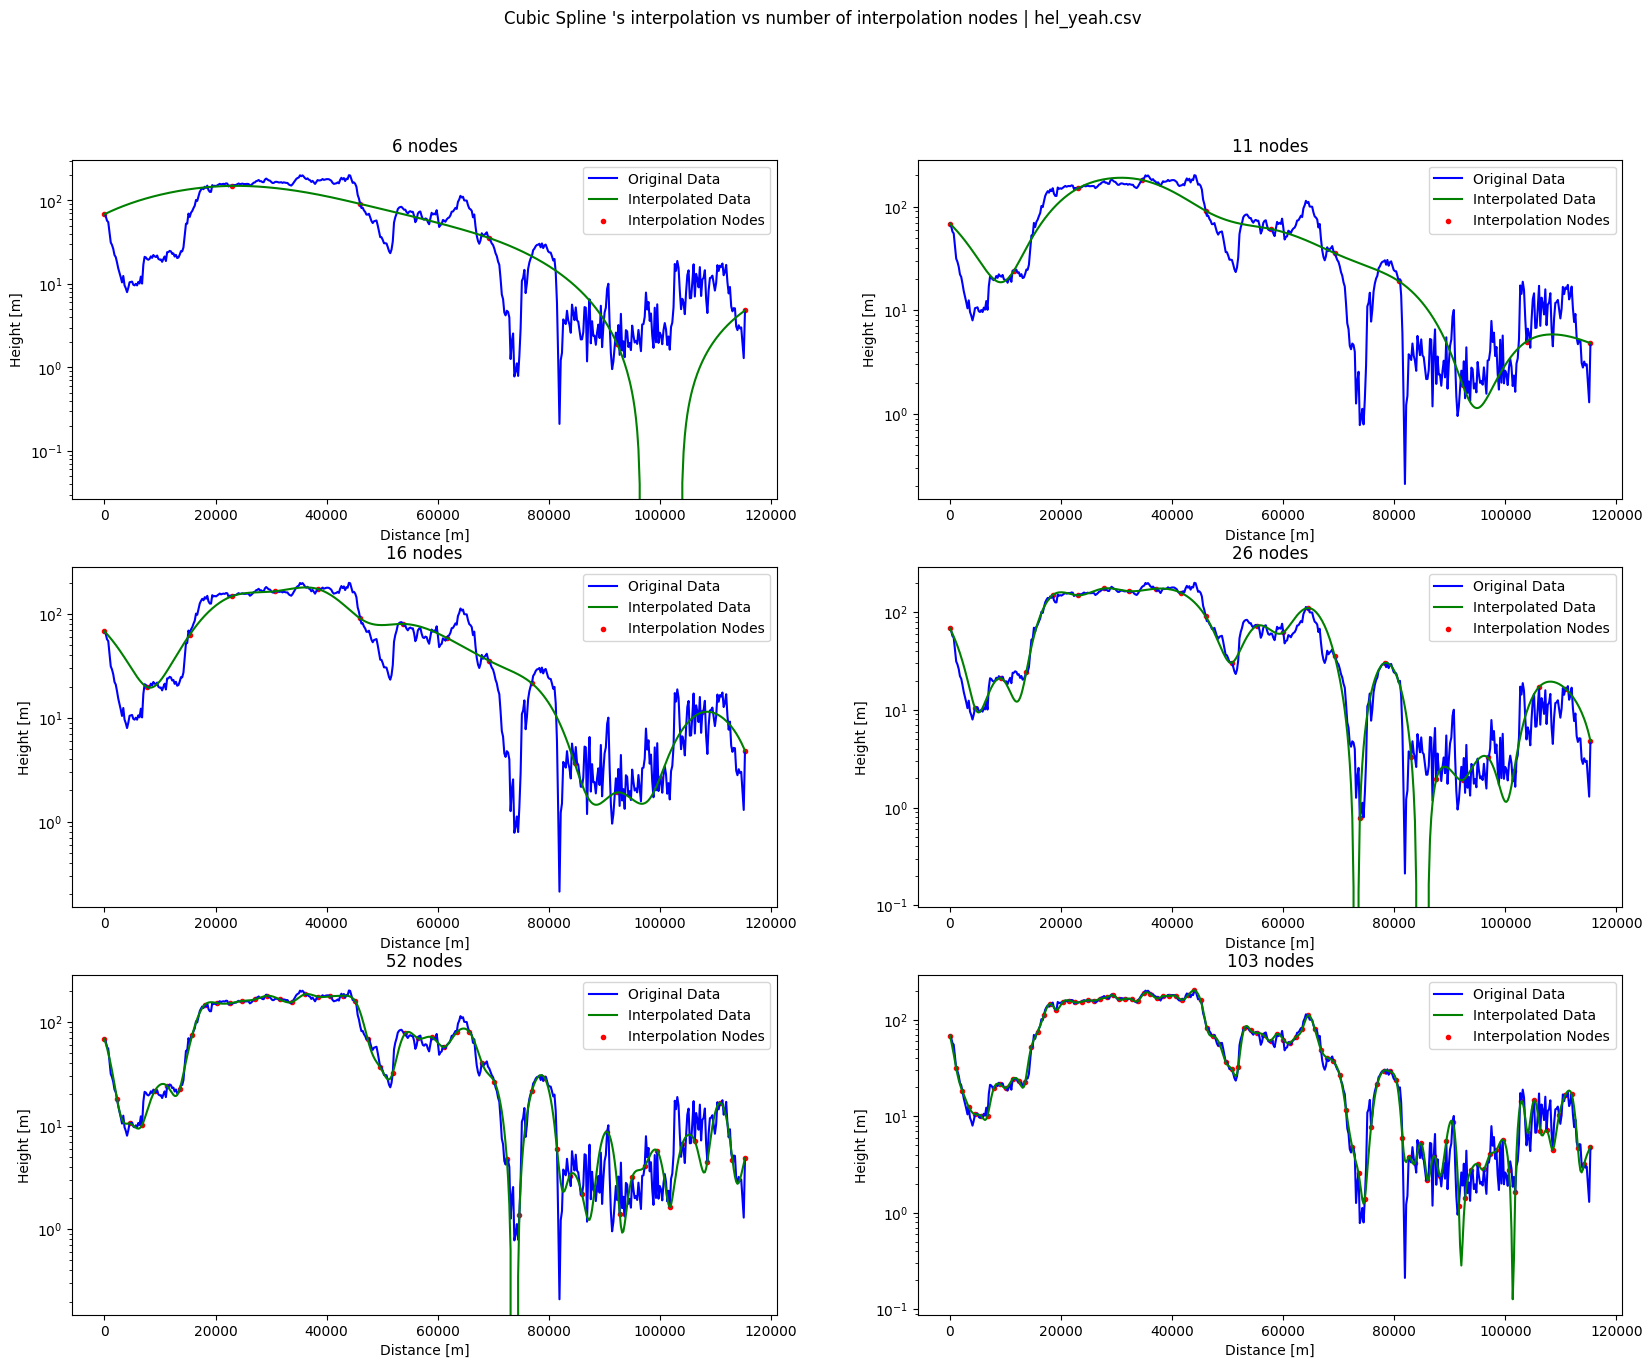

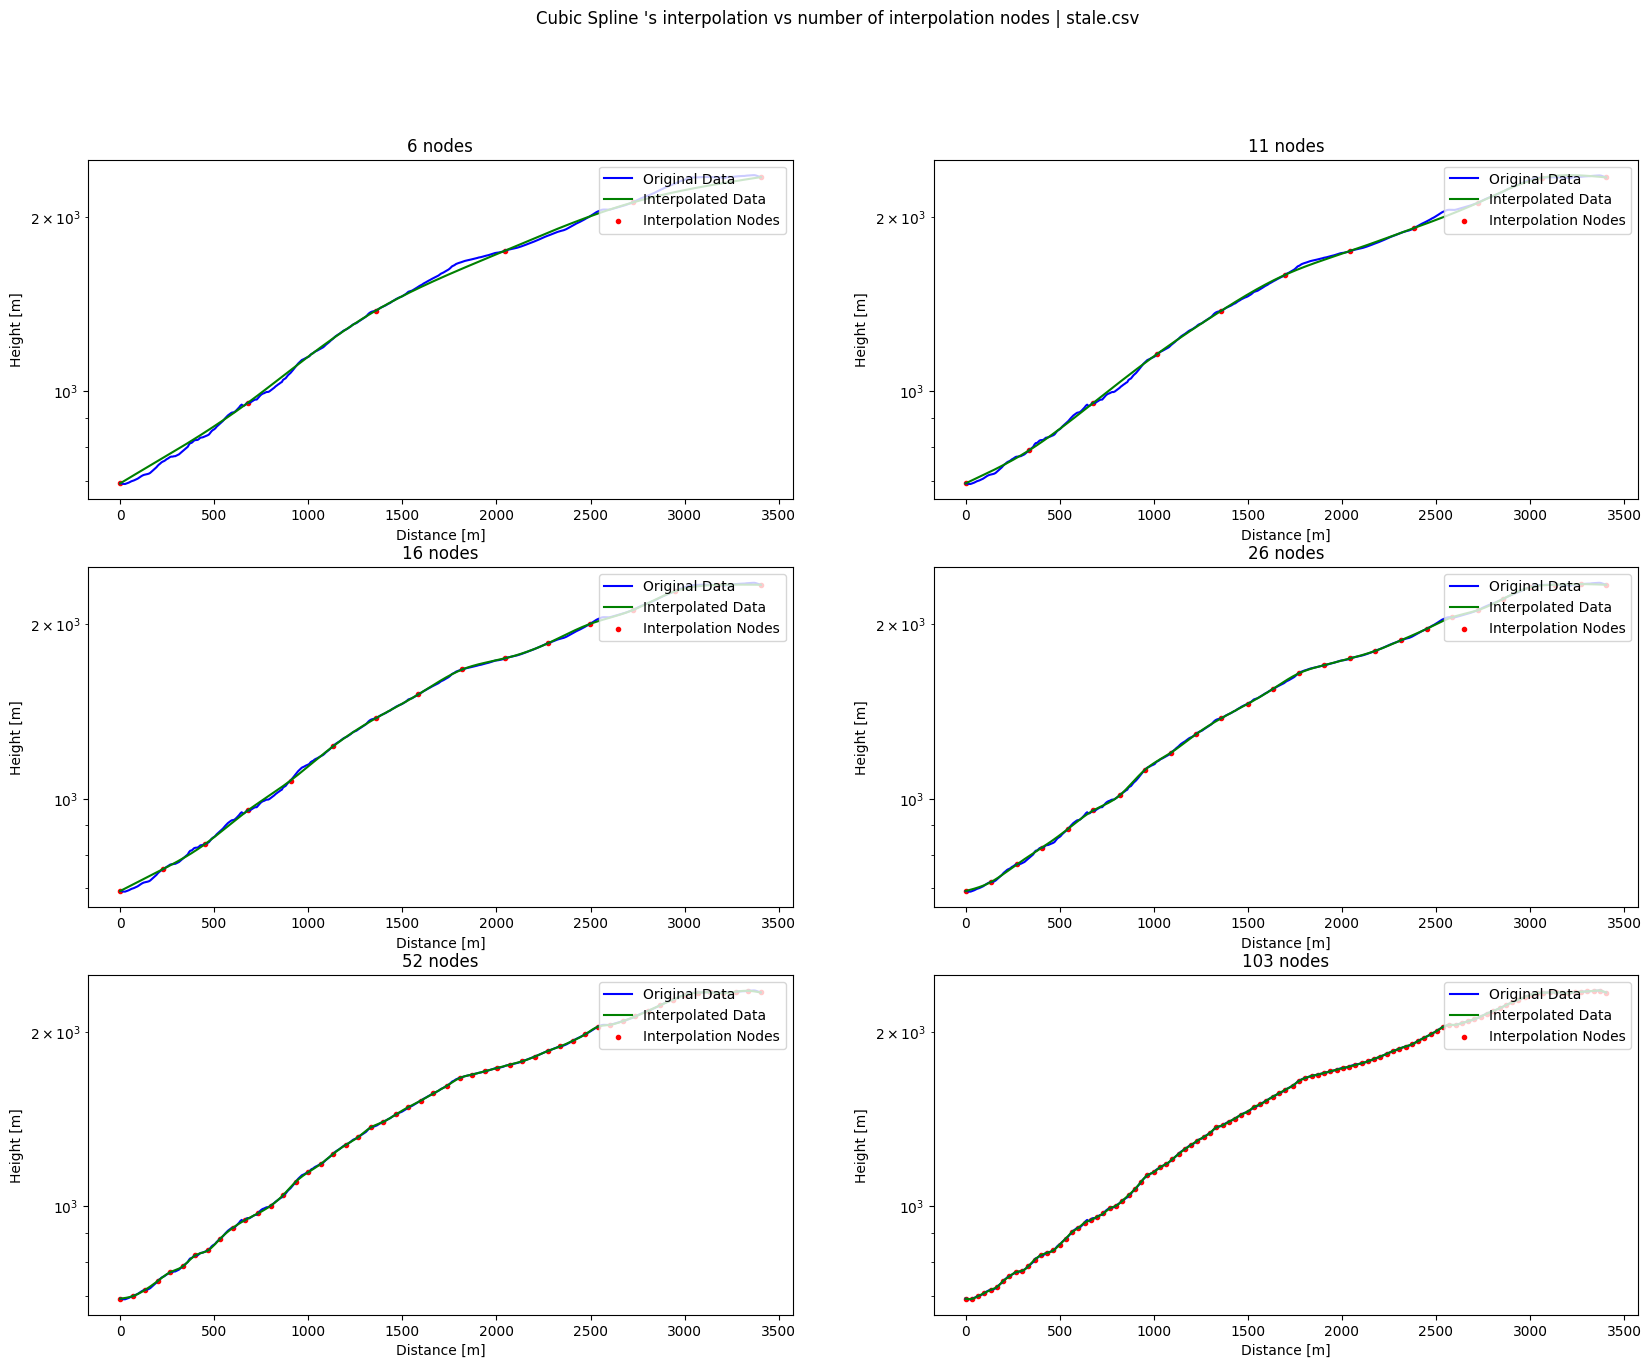

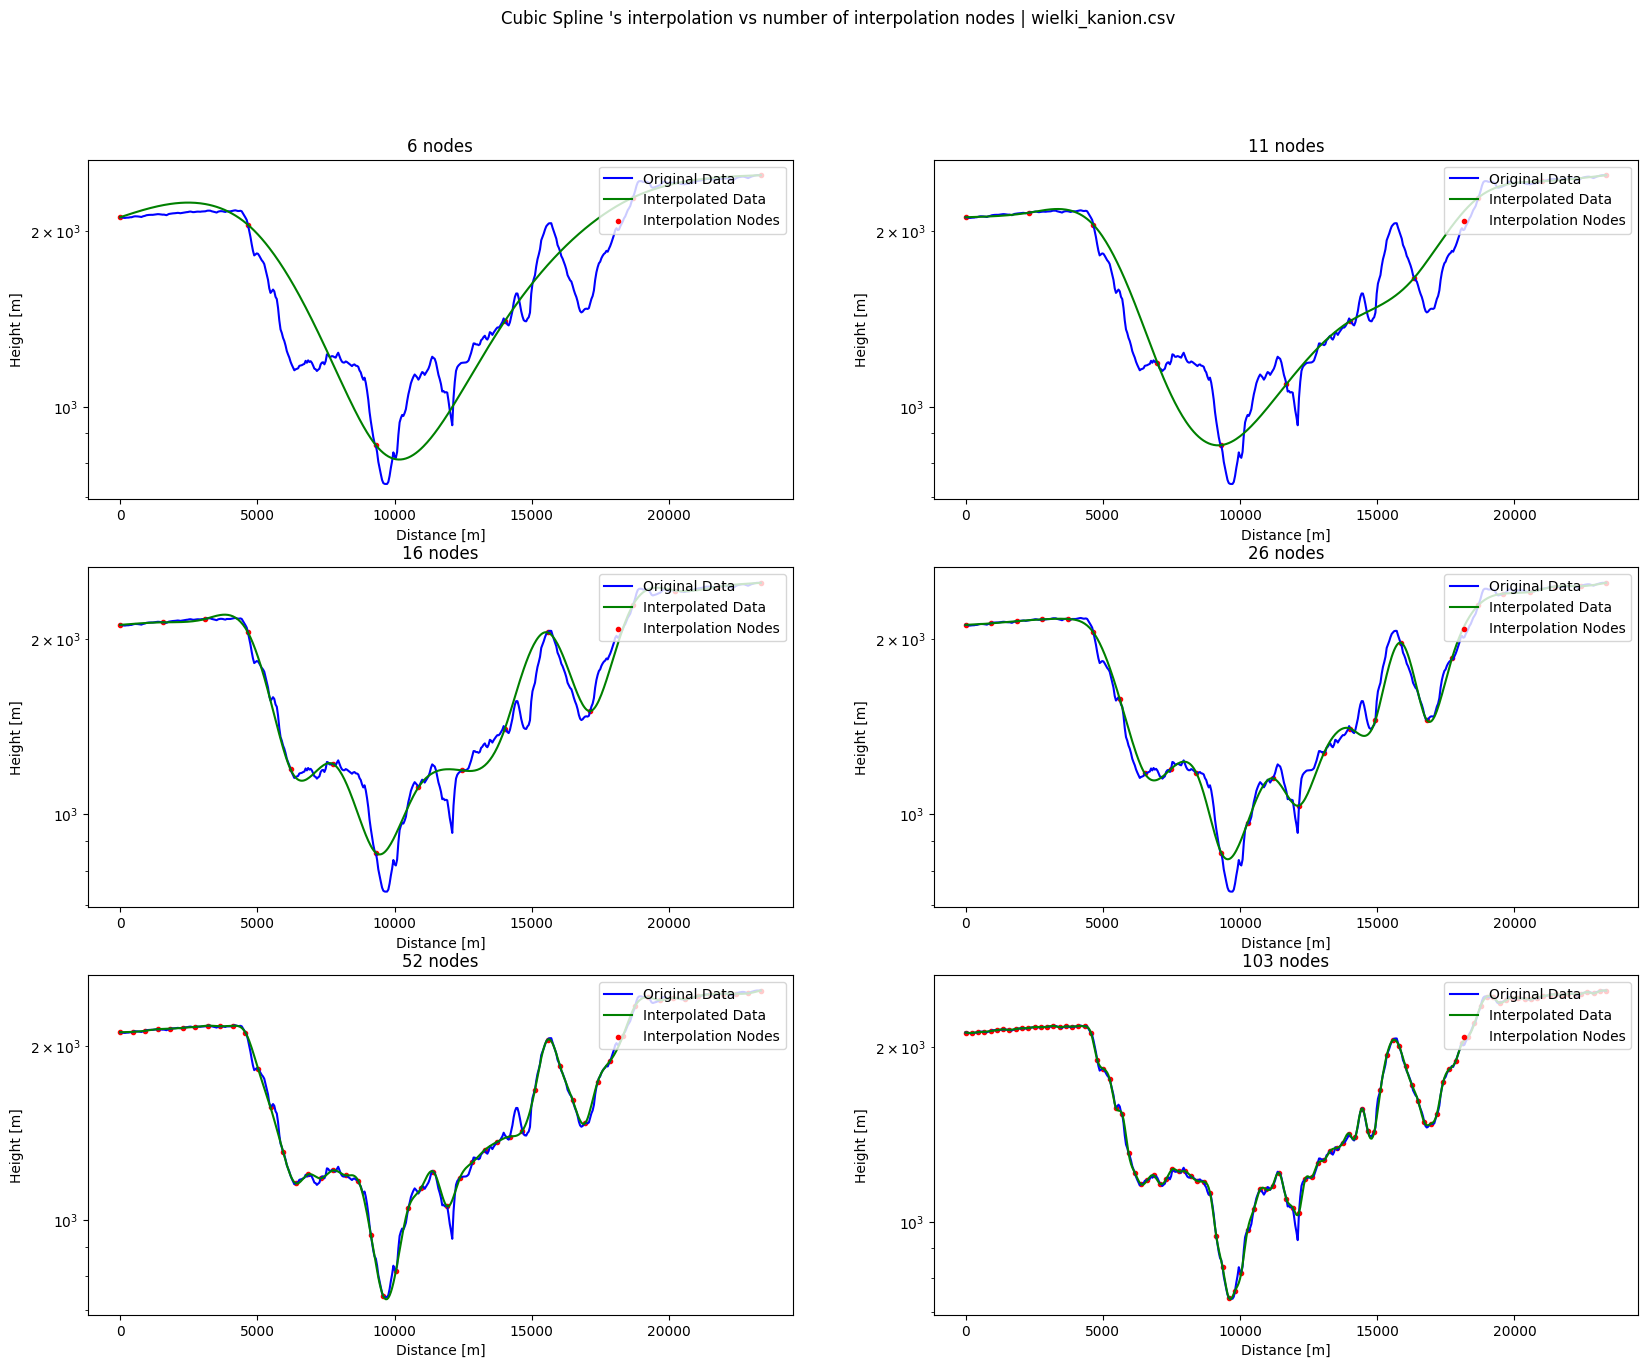

In [2]:
import matplotlib.pyplot as plt
from typing import Callable, List
from helper import *
import os
from pathlib import Path

# Basic analysis (how number of interpolation nodes affects interpolation results)

def plot_interpolation(
        handler: any,
        data: List[Tuple[float, float]],
        selection_points_distribution_method: Callable[[float, float, int], List[float]],
        number_of_selection_points: int,
        interpolation_method: Callable[[List[Tuple[float, float]],List[float]], List[float]],
        number_of_interpolation_points: int
    ):
    selected_points = find_closest_nodes(data, selection_points_distribution_method(data[0][0], data[-1][0], number_of_selection_points))
    x_points = linspace(data[0][0], data[-1][0], number_of_interpolation_points)
    y_points = interpolation_method(selected_points, x_points)
    handler.plot(get_x_values(data), get_y_values(data), color='blue')
    handler.plot(x_points, y_points, color='green')
    handler.scatter(get_x_values(selected_points), get_y_values(selected_points), color='red', s=9)
    handler.title.set_text(f'{number_of_selection_points} nodes')
    handler.set_yscale('log')
    handler.legend(['Original Data', 'Interpolated Data', 'Interpolation Nodes'], loc='upper right')
    handler.set_xlabel('Distance [m]')
    handler.set_ylabel('Height [m]')

n = [103, 52, 26, 16, 11, 6][::-1]

for file in os.listdir('../data'):
    nodes = read_nodes('../data/' + file)
    dataset_name = file.split('.csv')[0]
    Path(f'../plots/{dataset_name}').mkdir(parents=True, exist_ok=True)
    fig, axs = plt.subplots(3, 2)
    fig.set_size_inches(20, 15)
    fig.suptitle(f'Cubic Spline \'s interpolation vs number of interpolation nodes | {file}')
    for i in range(6):
        plot_interpolation(axs[i//2][i%2], nodes, linspace, n[i], cubic_interpolation, 512)
    plt.savefig(f'../plots/{dataset_name}/2_2_cubic_spline.png')
    #plt.show()